In [80]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

%matplotlib inline

In [81]:
# データの読み込み
train = pd.read_csv('input/train.csv', usecols=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin'])
test = pd.read_csv('input/test.csv', usecols=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin'])

sample = pd.read_csv('input/train.csv')

train.columns, test.columns

(Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin'], dtype='object'),
 Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin'], dtype='object'))

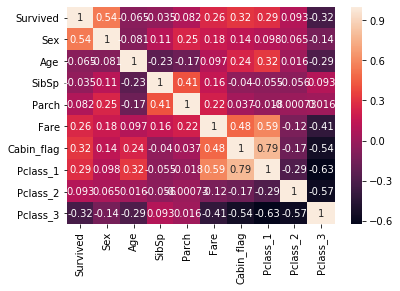

In [95]:
train.head(10)
sns.heatmap(train.corr(), annot=True)

In [83]:
# df = pd.concat([df, pd.get_dummies(df['Pclass'], prefix='Pclass')], axis=1)

# データの前処理

In [84]:
# 性別を0, 1に変換
sex_copy = train['Sex'].map({'male': 0, 'female': 1}).astype(int)
train['Sex'] = sex_copy

年代別生存率  
0～10: 0.59  
10～20: 0.38  
20～30: 0.37  
30～40: 0.45  
40～50: 0.38  
50～60: 0.40  
60～70: 0.24  
70～80: 0.20  

In [85]:
# ageを中央値で保管

med = train['Age'].median()
train['Age'] = train['Age'].fillna(med)

In [86]:
# # 最頻値である S で欠損を補完する
# train['Embarked'] = train['Embarked'].fillna('S')

# train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [87]:
#　✜ ⇐ D E B F C G A T n  ⇒ ☠
# キャビンを頭文字だけにして、欠損値はXとする
train['Cabin'] = train['Cabin'].fillna('X')

# levels = []
# for level in train['Cabin']:
#     levels.append(str(level)[0])
    
# train['Cabin'] = levels

# train['Cabin'] = train['Cabin'].map({'X': 0, 'A': 2, 'B': 6, 'C': 4, 'D': 8, 'E': 7, 'F': 5, 'G': 3, 'T': 1})

levels = []
for level in train['Cabin']:
    if str(level) != 'X':
        levels.append(1)
    else:
        levels.append(0)
train['Cabin_flag'] = levels
train = train.drop(columns=['Cabin'])

In [88]:
# Pclassをdummy変数化
train = pd.concat([train, pd.get_dummies(train['Pclass'], prefix='Pclass')], axis=1)
train = train.drop(columns=['Pclass'], axis=1)

# データの分割

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train.drop(columns=['Survived']),
                                                    train['Survived'],
                                                    random_state=0)

X_train.shape, X_valid.shape

((668, 9), (223, 9))

In [90]:
from sklearn.linear_model import LogisticRegression

logreg1 = LogisticRegression(C=1)
logreg1.fit(X_train, y_train)

logreg1.score(X_valid, y_valid)

0.8161434977578476

In [91]:
logreg2 = LogisticRegression(C=10)
logreg2.fit(X_train, y_train)

logreg2.score(X_valid, y_valid)

0.8161434977578476

In [92]:
logreg3 = LogisticRegression(C=100)
logreg3.fit(X_train, y_train)

logreg3.score(X_valid, y_valid)

0.8161434977578476

# 良かったモデルで再学習

In [13]:
final_model = LogisticRegression(C=10)
final_model.fit(train.drop(columns=['Survived']), train['Survived'])

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# テストデータでの予測

In [14]:
# テストデータにも同じ前処理
# Sex
sex_copy = test['Sex'].map({'male': 0, 'female': 1}).astype(int)
test['Sex'] = sex_copy

# Age
med = test['Age'].median()
test['Age'] = test['Age'].fillna(med)

# Embarked
# test['Embarked'] = test['Embarked'].fillna('S')
# test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Fare
test['Fare'] = test['Fare'].fillna(train['Fare'].median())


# Cabin
test['Cabin'] = test['Cabin'].fillna('X')

levels = []
for level in test['Cabin']:
    if str(level) != 'X':
        levels.append(1)
    else:
        levels.append(0)
test['Cabin_flag'] = levels
test = test.drop(columns=['Cabin'])

In [15]:
final_model.predict(test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [16]:
submit_data = pd.read_csv('input/gender_submission.csv')

submit_data['Survived'] = final_model.predict(test)

# CSVで保存
submit_data.to_csv('20191007_05_logreg1.csv', index=False)